In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
image_dataset = np.load("C:/Users/MSI/Documents/pyg_face-landmarks/pyg_face/raw/face_images.npz")['face_images']
landmark_labels = pd.read_csv("C:/Users/MSI/Documents/pyg_face-landmarks/pyg_face/raw/facial_keypoints.csv").to_numpy()

In [3]:
# import predicted dataset
pred_dict_train = torch.load("C:/Users/MSI/Documents/pyg_face-landmarks/pred_landmarks_train.pt")
pred_dict_valid = torch.load("C:/Users/MSI/Documents/pyg_face-landmarks/pred_landmarks_valid.pt")
pred_dict_test = torch.load("C:/Users/MSI/Documents/pyg_face-landmarks/pred_landmarks_test.pt")

In [12]:
pred_dict_train.keys()

dict_keys(['landmarks_pred', 'image_id'])

In [4]:
trunc_size = sum([pred_dict_train["image_id"].size(0),pred_dict_valid["image_id"].size(0),pred_dict_test["image_id"].size(0)])

In [5]:
trunc_dataset = image_dataset[:,:,:trunc_size]
trunc_landmarks = landmark_labels[:trunc_size,:]

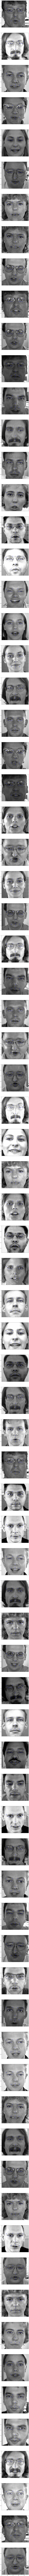

In [9]:
pred_dataset = pred_dict_train
pred_img_ids =pred_dataset["image_id"].numpy().tolist()
pred_landmarks =pred_dataset["landmarks_pred"]
Spic = image_dataset.shape[0] # image width
fig, ax = plt.subplots(len(pred_img_ids),1,sharex=True,sharey=True,figsize=[1*10,len(pred_img_ids)*10])
for inx,img in enumerate(pred_img_ids):
    ax[inx].imshow(trunc_dataset[:,:,img], cmap='gray')
#     ax[inx].scatter(trunc_landmarks[img][0::2]*Spic,trunc_landmarks[img][1::2]*Spic,marker='X',c='r',s=100)
    ax[inx].scatter(pred_landmarks[inx][0::2],pred_landmarks[inx][1::2],marker='+',c='b',s=150)
#     ax[inx].set_xticks(())
#     ax[inx].set_yticks(())
